In [1]:
import pandas as pd
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation , Dropout,GRU, LSTM, Bidirectional, Flatten,Conv1D, MaxPooling2D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('NSLkdd_train.txt', names = [ 'duration'
, 'protocol_type' 
, 'service'
, 'flag'
, 'src_bytes' 
, 'dst_bytes' 
, 'land' 
, 'wrong_fragment' 
, 'urgent' 
, 'hot' 
, 'num_failed_logins' 
, 'logged_in' 
, 'num_compromised' 
, 'root_shell' 
, 'su_attempted' 
, 'num_root' 
, 'num_file_creations' 
, 'num_shells' 
, 'num_access_files' 
, 'num_outbound_cmds' 
, 'is_host_login'  
, 'is_guest_login' 
, 'count' 
, 'srv_count' 
, 'serror_rate' 
, 'srv_serror_rate' 
, 'rerror_rate' 
, 'srv_rerror_rate' 
, 'same_srv_rate' 
, 'diff_srv_rate' 
, 'srv_diff_host_rate' 
, 'dst_host_count' 
, 'dst_host_srv_count' 
, 'dst_host_same_srv_rate' 
, 'dst_host_diff_srv_rate' 
, 'dst_host_same_src_port_rate' 
, 'dst_host_srv_diff_host_rate' 
, 'dst_host_serror_rate' 
, 'dst_host_srv_serror_rate' 
, 'dst_host_rerror_rate' 
, 'dst_host_srv_rerror_rate' 
, 'diffic' 
, 'class' ])

In [4]:
df['service'].unique().shape

(65,)

In [5]:
len(df[df['class'] == 'normal'])


6503

In [6]:
len(df[df['class'] == 'Dos'])

4487

In [7]:
len(df[df['class']== 'Probe'])

1072

In [8]:
len(df[df['class']== 'U2R'])


7

In [9]:
len(df[df['class']== 'R2L'])


93

In [10]:
df['protocol_type']= df['protocol_type'].astype('category').cat.codes
df['flag'] = df['flag'].astype('category').cat.codes
df['service'] = df['service'].astype('category').cat.codes

In [11]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,diffic,class
0,0,1,23,9,287,1281,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,21,normal
1,0,1,23,9,344,1451,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.02,0.02,21,normal
2,0,0,15,9,1032,0,0,0,0,0,...,0.34,0.04,0.34,0.00,0.08,0.0,0.02,0.00,19,Dos
3,0,2,45,9,28,0,0,3,0,0,...,0.17,0.02,0.17,0.00,0.00,0.0,0.00,0.00,15,Dos
4,0,1,23,9,331,1694,0,0,0,0,...,1.00,0.00,0.02,0.02,0.00,0.0,0.00,0.00,21,normal


In [12]:
y_train = df['class'].astype('category').cat.codes

In [13]:
y_train.unique()

array([4, 0, 1, 3, 2], dtype=int64)

In [14]:
y_train = np_utils.to_categorical(y_train,5)

In [15]:
y_train.shape

(12162, 5)

In [16]:
y_train[2]

array([1., 0., 0., 0., 0.], dtype=float32)

In [17]:
del df['class']

In [18]:
x_train = df.values

In [19]:
df_test = pd.read_csv('NSLkdd_test.txt', names = [ 'duration'
, 'protocol_type' 
, 'service'
, 'flag'
, 'src_bytes' 
, 'dst_bytes' 
, 'land' 
, 'wrong_fragment' 
, 'urgent' 
, 'hot' 
, 'num_failed_logins' 
, 'logged_in' 
, 'num_compromised' 
, 'root_shell' 
, 'su_attempted' 
, 'num_root' 
, 'num_file_creations' 
, 'num_shells' 
, 'num_access_files' 
, 'num_outbound_cmds' 
, 'is_host_login'  
, 'is_guest_login' 
, 'count' 
, 'srv_count' 
, 'serror_rate' 
, 'srv_serror_rate' 
, 'rerror_rate' 
, 'srv_rerror_rate' 
, 'same_srv_rate' 
, 'diff_srv_rate' 
, 'srv_diff_host_rate' 
, 'dst_host_count' 
, 'dst_host_srv_count' 
, 'dst_host_same_srv_rate' 
, 'dst_host_diff_srv_rate' 
, 'dst_host_same_src_port_rate' 
, 'dst_host_srv_diff_host_rate' 
, 'dst_host_serror_rate' 
, 'dst_host_srv_serror_rate' 
, 'dst_host_rerror_rate' 
, 'dst_host_srv_rerror_rate' 
, 'diffic' 
, 'class' ])

In [20]:
df_test['protocol_type']= df_test['protocol_type'].astype('category').cat.codes
df_test['flag'] = df_test['flag'].astype('category').cat.codes
df_test['service'] = df_test['service'].astype('category').cat.codes

In [21]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,diffic,class
0,0,1,58,5,0,0,0,0,0,0,...,0.06,0.04,0.0,0.0,1.0,1.0,0.0,0.0,18,Dos
1,0,1,25,5,0,0,0,0,0,0,...,0.07,0.05,0.0,0.0,1.0,1.0,0.0,0.0,19,Dos
2,0,1,23,9,195,1274,0,0,0,0,...,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,21,normal
3,0,1,23,9,333,420,0,0,0,0,...,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,21,normal
4,0,1,25,5,0,0,0,0,0,0,...,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0,20,Dos


In [22]:
y_test = df_test['class'].astype('category').cat.codes



In [23]:
y_test.unique()

array([0, 4, 1, 2, 3], dtype=int64)

In [24]:
y_test = np_utils.to_categorical(y_test,5)

In [25]:
y_test.shape

(5001, 5)

In [26]:
del df_test['class']

In [27]:
x_test = df_test.values

In [28]:
x_train

array([[0.0e+00, 1.0e+00, 2.3e+01, ..., 0.0e+00, 0.0e+00, 2.1e+01],
       [0.0e+00, 1.0e+00, 2.3e+01, ..., 2.0e-02, 2.0e-02, 2.1e+01],
       [0.0e+00, 0.0e+00, 1.5e+01, ..., 2.0e-02, 0.0e+00, 1.9e+01],
       ...,
       [0.0e+00, 0.0e+00, 1.4e+01, ..., 0.0e+00, 0.0e+00, 1.5e+01],
       [0.0e+00, 1.0e+00, 2.8e+01, ..., 0.0e+00, 0.0e+00, 1.8e+01],
       [0.0e+00, 1.0e+00, 2.3e+01, ..., 0.0e+00, 0.0e+00, 2.1e+01]])

In [29]:
y_train[2363]

array([0., 0., 1., 0., 0.], dtype=float32)

In [30]:
x_test

array([[ 0.,  1., 58., ...,  0.,  0., 18.],
       [ 0.,  1., 25., ...,  0.,  0., 19.],
       [ 0.,  1., 23., ...,  0.,  0., 21.],
       ...,
       [ 0.,  1., 20., ...,  0.,  0., 13.],
       [ 0.,  2., 12., ...,  0.,  0., 19.],
       [ 0.,  1., 23., ...,  0.,  0., 21.]])

In [31]:
y_test[1016]

array([0., 0., 0., 1., 0.], dtype=float32)

In [32]:
x_test.shape

(5001, 42)

In [33]:
y_test.shape

(5001, 5)

In [34]:
x_train.shape

(12162, 42)

In [35]:
from keras.callbacks import EarlyStopping 
early_stopping_monitor = EarlyStopping(patience=2)
model = Sequential()

model.add(Dense(35, activation = 'relu',  input_dim = 42))
model.add(Dense(22, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
#model.add(Dropout(0.8))
model.add(Dense(5, activation = 'softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train,batch_size = 20, nb_epoch=1, verbose=1)

model.predict

score = model.evaluate(x_test, y_test, verbose=0)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 35)                1505      
_________________________________________________________________
dense_2 (Dense)              (None, 22)                792       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                230       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
Total params: 2,582
Trainable params: 2,582
Non-trainable params: 0
_________________________________________________________________


c:\python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/1
12162/12162 [==============================] - 7s 548us/step - loss: 1.8082 - acc: 0.8384
[0.8603886038845622, 0.9204159168404737]


In [36]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((12162, 42), (12162, 5), (5001, 42), (5001, 5))

In [37]:
gru = Sequential()
gru.add(GRU(50, activation='relu', return_sequences=True, input_dim = 42))
gru.add(GRU(50, activation='relu'))
gru.add(Dense(5, activation = 'softmax'))
gru.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# fit model
history=gru.fit(x_train.reshape(12162,1, 42), y_train.reshape(12162,5), epochs=20, verbose=1,batch_size = 100,
               validation_data=(x_test.reshape(5001,1, 42), y_test.reshape(5001,5)))

c:\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
c:\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(50, activation="relu", return_sequences=True, input_shape=(None, 42))`
  


Train on 12162 samples, validate on 5001 samples
Epoch 1/20
12162/12162 [==============================] - 7s 582us/step - loss: 1.0382 - acc: 0.8670 - val_loss: 0.5782 - val_acc: 0.9310
Epoch 2/20
12162/12162 [==============================] - 3s 234us/step - loss: 0.5366 - acc: 0.9362 - val_loss: 0.4934 - val_acc: 0.9466 1s - loss: 0.5 - ETA: 0s - loss: 0.5540
Epoch 3/20
12162/12162 [==============================] - 3s 248us/step - loss: 0.4640 - acc: 0.9509 - val_loss: 0.4529 - val_acc: 0.9520
Epoch 4/20
12162/12162 [==============================] - 3s 255us/step - loss: 0.4119 - acc: 0.9572 - val_loss: 0.4408 - val_acc: 0.9526
Epoch 5/20
12162/12162 [==============================] - 3s 218us/step - loss: 0.4019 - acc: 0.9580 - val_loss: 0.4123 - val_acc: 0.9584
Epoch 6/20
12162/12162 [==============================] - 3s 223us/step - loss: 0.3814 - acc: 0.9638 - val_loss: 0.3790 - val_acc: 0.9640
Epoch 7/20
12162/12162 [==============================] - 3s 213us/step - loss: 0.3

c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\matplotlib\legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


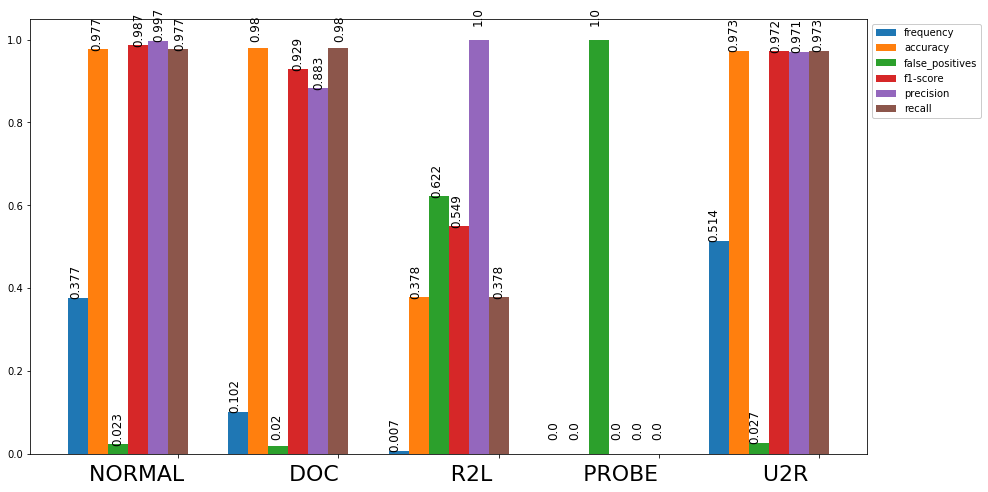

In [42]:
from sklearn import metrics
import numpy as np
results=[list(i).index(max(i)) for i in gru.predict(x_test.reshape(5001,1, 42))]
tru=[list(i).index(max(i)) for i in y_test]
cm=confusion_matrix(tru,results)
frequencies=[tru.count(i)/len(tru) for i in set(tru)]
accuracies={i:0 for i in range(5)}
for i,val in enumerate(tru):
    if val==results[i]:
        accuracies[val]+=1
accuracy=[accuracies[i]/tru.count(i) for i in range(5)]
false_positives={i:0 for i in range(5)}
for i in range(5):
    false_positives[i]=(sum(cm[i])-cm[i][i])/sum(cm[i])
cf=metrics.classification_report(tru,results,output_dict=True)
data=np.array([np.array(frequencies),np.array(accuracy),np.array([i for i in false_positives.values()])
               ,np.array([cf[str(i)]['f1-score'] for i in range(5)]),
               np.array([cf[str(i)]['precision'] for i in range(5)]),
               np.array([cf[str(i)]['recall'] for i in range(5)])]).T
x = np.arange(data.shape[0])
dx = (np.arange(data.shape[1])-data.shape[1]/2.)/(data.shape[1]+2.)
d = 1./(data.shape[1]+2.)
fig, ax=plt.subplots()
ax.figure.set_size_inches(15, 8)
labels=['frequency','accuracy','false_positives','f1-score','precision','recall']
for i in range(data.shape[1]):
    ax.bar(x+dx[i],data[:,i], width=d, label=labels[i],tick_label='')
x0=-0.43
for i in range(5):
    for j in range(6):
        ax.text(x0,data[i][j]+0.055,round(data[i][j],3),fontsize=12,rotation=90)
        x0+=0.13
    x0+=0.215       
plt.xlabel('NORMAL               DOC                R2L             PROBE               U2R',fontsize=22)
plt.legend(framealpha=1,loc=2,bbox_to_anchor=(1, 1)).draggable()
plt.show()

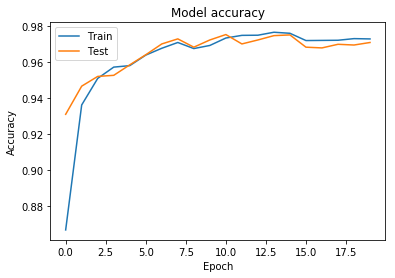

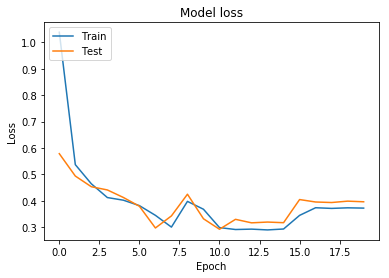

In [43]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [44]:
biLSTM = Sequential()
biLSTM.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_dim = 42)))
biLSTM.add(Bidirectional(LSTM(50, activation='relu')))
biLSTM.add(Dense(5, activation = 'softmax'))
biLSTM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# fit model
history=biLSTM.fit(x_train.reshape(12162,1, 42), y_train.reshape(12162,5), epochs=20, verbose=1,batch_size = 100,
               validation_data=(x_test.reshape(5001,1, 42), y_test.reshape(5001,5)))

c:\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
c:\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, activation="relu", return_sequences=True, input_shape=(None, 42))`
  


Train on 12162 samples, validate on 5001 samples
Epoch 1/20
12162/12162 [==============================] - 14s 1ms/step - loss: 0.6787 - acc: 0.9140 - val_loss: 0.4864 - val_acc: 0.9484
Epoch 2/20
12162/12162 [==============================] - 6s 492us/step - loss: 0.4508 - acc: 0.9484 - val_loss: 0.4321 - val_acc: 0.9560
Epoch 3/20
12162/12162 [==============================] - 6s 477us/step - loss: 0.4360 - acc: 0.9544 - val_loss: 0.4298 - val_acc: 0.9562
Epoch 4/20
12162/12162 [==============================] - 6s 493us/step - loss: 0.3745 - acc: 0.9604 - val_loss: 0.4037 - val_acc: 0.9612
Epoch 5/20
12162/12162 [==============================] - 6s 457us/step - loss: 0.3467 - acc: 0.9656 - val_loss: 0.2899 - val_acc: 0.9722
Epoch 6/20
12162/12162 [==============================] - 6s 468us/step - loss: 0.2926 - acc: 0.9705 - val_loss: 0.2982 - val_acc: 0.9676
Epoch 7/20
12162/12162 [==============================] - 6s 467us/step - loss: 0.2810 - acc: 0.9734 - val_loss: 0.2829 - va

c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\matplotlib\legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


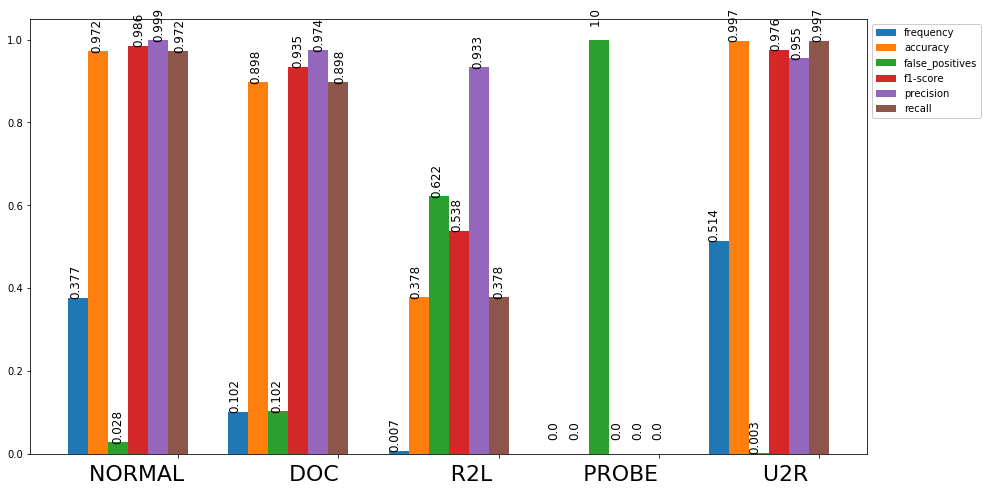

In [45]:
results=[list(i).index(max(i)) for i in biLSTM.predict(x_test.reshape(5001,1, 42))]
tru=[list(i).index(max(i)) for i in y_test]
cm=confusion_matrix(tru,results)
frequencies=[tru.count(i)/len(tru) for i in set(tru)]
accuracies={i:0 for i in range(5)}
for i,val in enumerate(tru):
    if val==results[i]:
        accuracies[val]+=1
accuracy=[accuracies[i]/tru.count(i) for i in range(5)]
false_positives={i:0 for i in range(5)}
for i in range(5):
    false_positives[i]=(sum(cm[i])-cm[i][i])/sum(cm[i])
cf=metrics.classification_report(tru,results,output_dict=True)
data=np.array([np.array(frequencies),np.array(accuracy),np.array([i for i in false_positives.values()])
               ,np.array([cf[str(i)]['f1-score'] for i in range(5)]),
               np.array([cf[str(i)]['precision'] for i in range(5)]),
               np.array([cf[str(i)]['recall'] for i in range(5)])]).T
x = np.arange(data.shape[0])
dx = (np.arange(data.shape[1])-data.shape[1]/2.)/(data.shape[1]+2.)
d = 1./(data.shape[1]+2.)
fig, ax=plt.subplots()
ax.figure.set_size_inches(15, 8)
labels=['frequency','accuracy','false_positives','f1-score','precision','recall']
for i in range(data.shape[1]):
    ax.bar(x+dx[i],data[:,i], width=d, label=labels[i],tick_label='')
x0=-0.43
for i in range(5):
    for j in range(6):
        ax.text(x0,data[i][j]+0.055,round(data[i][j],3),fontsize=12,rotation=90)
        x0+=0.13
    x0+=0.215       
plt.xlabel('NORMAL               DOC                R2L             PROBE               U2R',fontsize=22)
plt.legend(framealpha=1,loc=2,bbox_to_anchor=(1, 1)).draggable()
plt.show()

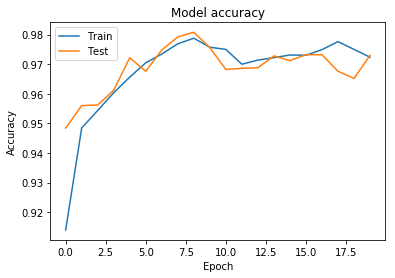

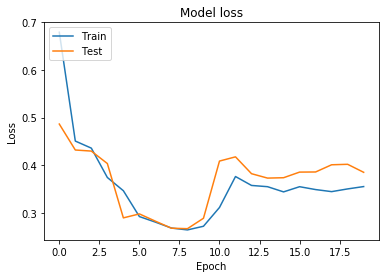

In [46]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [47]:
from keras.layers import Input, Dense
from keras.models import Model

In [48]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(1,x_train.shape[1]))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(5, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [52]:
autoencoder.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=autoencoder.fit(x_train.reshape(12162,1, 42), y_train.reshape(12162,1,5),epochs=10,batch_size=20,shuffle=True,
               validation_data=(x_test.reshape(5001,1, 42), y_test.reshape(5001,1,5)))

Train on 12162 samples, validate on 5001 samples
Epoch 1/10
12162/12162 [==============================] - 9s 733us/step - loss: nan - acc: 0.3689 - val_loss: nan - val_acc: 0.3769
Epoch 2/10
12162/12162 [==============================] - 6s 507us/step - loss: nan - acc: 0.3689 - val_loss: nan - val_acc: 0.3769
Epoch 3/10
12162/12162 [==============================] - 6s 503us/step - loss: nan - acc: 0.3689 - val_loss: nan - val_acc: 0.3769
Epoch 4/10
12162/12162 [==============================] - 5s 430us/step - loss: nan - acc: 0.3689 - val_loss: nan - val_acc: 0.3769
Epoch 5/10
12162/12162 [==============================] - 6s 489us/step - loss: nan - acc: 0.3689 - val_loss: nan - val_acc: 0.3769
Epoch 6/10
12162/12162 [==============================] - 6s 466us/step - loss: nan - acc: 0.3689 - val_loss: nan - val_acc: 0.3769
Epoch 7/10
12162/12162 [==============================] - 5s 443us/step - loss: nan - acc: 0.3689 - val_loss: nan - val_acc: 0.3769
Epoch 8/10
12162/12162 [===

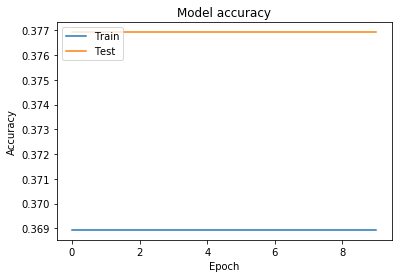

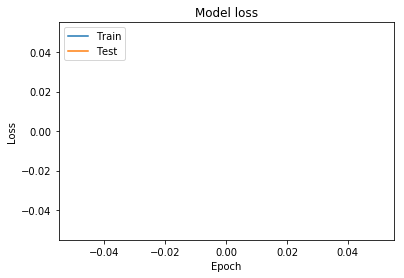

In [53]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 20, 50
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    print(trainX.shape, trainy.shape)
    history=model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=1,
                      validation_data=(testX, testy))
    return history,model
history,cnn=evaluate_model(x_train.reshape(12162,1, 42), y_train.reshape(12162,5),x_test.reshape(5001,1, 42), y_test.reshape(5001,5))

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
(12162, 1, 42) (12162, 5)
Train on 12162 samples, validate on 5001 samples
Epoch 1/20
12162/12162 [==============================] - 6s 474us/step - loss: 1.4016 - acc: 0.7810 - val_loss: 0.7545 - val_acc: 0.8620
Epoch 2/20
12162/12162 [==============================] - 3s 255us/step - loss: 0.8067 - acc: 0.8416 - val_loss: 0.6776 - val_acc: 0.8860
Epoch 3/20
12162/12162 [==============================] - 4s 323us/step - loss: 0.7148 - acc: 0.8569 - val_loss: 0.6459 - val_acc: 0.9090
Epoch 4/20
12162/12162 [==============================] - 4s 354us/step - loss: 0.6668 - acc: 0.8702 - val_loss: 0.6065 - val_acc: 0.9034
Epoch 5/20
12162/12162 [==============================] - 4s 291us/step - loss: 0.6378 - acc: 0.8827 - val_loss: 0.5845 - val_acc: 0.9226
Epoch 6/20
12162/12162 [==============================] - 4s 356us/step - loss: 0.6023 - acc: 0.8863 - val_loss: 0.5702 - val_acc: 0.9320
Epoch 7/20
121

c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\matplotlib\legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


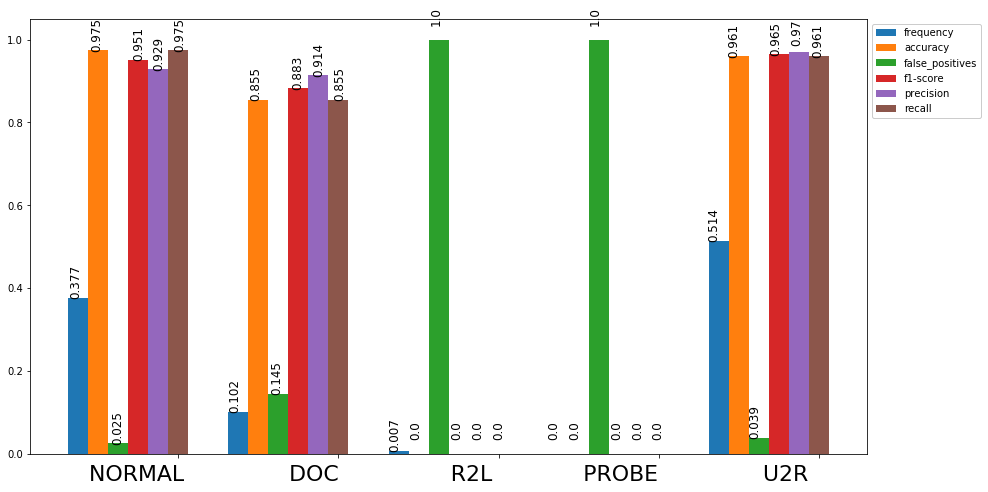

In [55]:
results=[list(i).index(max(i)) for i in cnn.predict(x_test.reshape(5001,1, 42))]
tru=[list(i).index(max(i)) for i in y_test]
cm=confusion_matrix(tru,results)
frequencies=[tru.count(i)/len(tru) for i in set(tru)]
accuracies={i:0 for i in range(5)}
for i,val in enumerate(tru):
    if val==results[i]:
        accuracies[val]+=1
accuracy=[accuracies[i]/tru.count(i) for i in range(5)]
false_positives={i:0 for i in range(5)}
for i in range(5):
    false_positives[i]=(sum(cm[i])-cm[i][i])/sum(cm[i])
cf=metrics.classification_report(tru,results,output_dict=True)
data=np.array([np.array(frequencies),np.array(accuracy),np.array([i for i in false_positives.values()])
               ,np.array([cf[str(i)]['f1-score'] for i in range(5)]),
               np.array([cf[str(i)]['precision'] for i in range(5)]),
               np.array([cf[str(i)]['recall'] for i in range(5)])]).T
x = np.arange(data.shape[0])
dx = (np.arange(data.shape[1])-data.shape[1]/2.)/(data.shape[1]+2.)
d = 1./(data.shape[1]+2.)
fig, ax=plt.subplots()
ax.figure.set_size_inches(15, 8)
labels=['frequency','accuracy','false_positives','f1-score','precision','recall']
for i in range(data.shape[1]):
    ax.bar(x+dx[i],data[:,i], width=d, label=labels[i],tick_label='')
x0=-0.43
for i in range(5):
    for j in range(6):
        ax.text(x0,data[i][j]+0.055,round(data[i][j],3),fontsize=12,rotation=90)
        x0+=0.13
    x0+=0.215       
plt.xlabel('NORMAL               DOC                R2L             PROBE               U2R',fontsize=22)
plt.legend(framealpha=1,loc=2,bbox_to_anchor=(1, 1)).draggable()
plt.show()

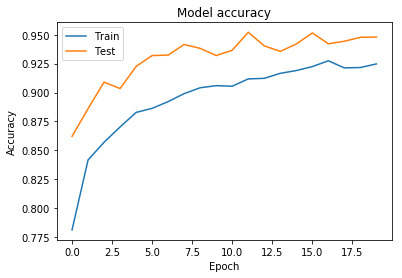

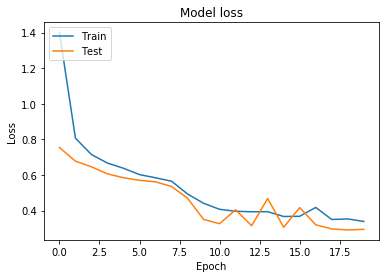

In [56]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [58]:
from sklearn.metrics import roc_curve,auc
res=cnn.predict(x_test.reshape(5001,1, 42))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], res[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), res.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw = 2

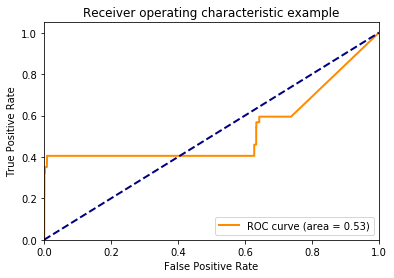

In [59]:
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [60]:
res=gru.predict(x_test.reshape(5001,1, 42))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], res[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), res.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw = 2

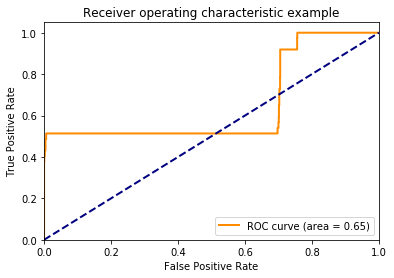

In [61]:
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

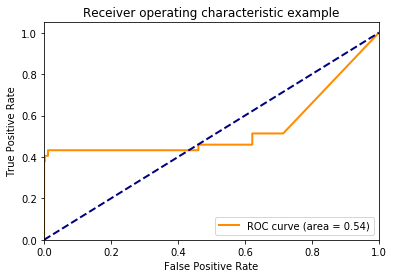

In [62]:
res=biLSTM.predict(x_test.reshape(5001,1, 42))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], res[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), res.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [65]:
lstm_output_size = 70
from keras.layers import Convolution1D
cnn = Sequential()
cnn.add(Convolution1D(48, 3, border_mode="same",activation="relu",input_shape=(42, 1)))
cnn.add(Convolution1D(48, 3, border_mode="same", activation="relu"))
cnn.add(MaxPooling1D(pool_length=(2)))
cnn.add(Convolution1D(16, 3, border_mode="same", activation="relu"))
cnn.add(Convolution1D(16, 3, border_mode="same", activation="relu"))
cnn.add(MaxPooling1D(pool_length=(2)))
cnn.add(LSTM(lstm_output_size))
cnn.add(Dropout(0.1))
cnn.add(Dense(5, activation="softmax"))

c:\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(48, 3, activation="relu", input_shape=(42, 1), padding="same")`
  after removing the cwd from sys.path.
c:\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(48, 3, activation="relu", padding="same")`
  """
c:\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  
c:\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, activation="relu", padding="same")`
  import sys
c:\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, activation="relu", padding="same")`
  
c:\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling1D` call to the

In [66]:
# define optimizer and objective, compile cnn
cnn.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
# train
history=cnn.fit(x_train.reshape(12162, 42,1), y_train.reshape(12162,5), nb_epoch=10, validation_data=(x_test.reshape(5001, 42,1), y_test.reshape(5001,5)))

c:\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 12162 samples, validate on 5001 samples
Epoch 1/10
12162/12162 [==============================] - 48s 4ms/step - loss: 0.3173 - acc: 0.8975 - val_loss: 0.2120 - val_acc: 0.9384A: 3s 
Epoch 2/10
12162/12162 [==============================] - 39s 3ms/step - loss: 0.1367 - acc: 0.9549 - val_loss: 0.0915 - val_acc: 0.9658
Epoch 3/10
12162/12162 [==============================] - 37s 3ms/step - loss: 0.0747 - acc: 0.9741 - val_loss: 0.1657 - val_acc: 0.9342
Epoch 4/10
12162/12162 [==============================] - 36s 3ms/step - loss: 0.0544 - acc: 0.9808 - val_loss: 0.0551 - val_acc: 0.9824
Epoch 5/10
12162/12162 [==============================] - 36s 3ms/step - loss: 0.0523 - acc: 0.9831 - val_loss: 0.0334 - val_acc: 0.9882
Epoch 6/10
12162/12162 [==============================] - 37s 3ms/step - loss: 0.0392 - acc: 0.9859 - val_loss: 0.0327 - val_acc: 0.9900
Epoch 7/10
12162/12162 [==============================] - 35s 3ms/step - loss: 0.0277 - acc: 0.9902 - val_loss: 0.0244 - va

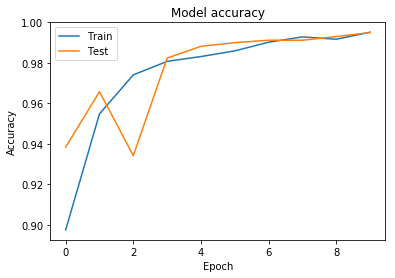

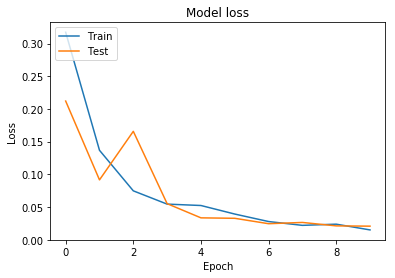

In [67]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\python36\lib\site-packages\matplotlib\legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


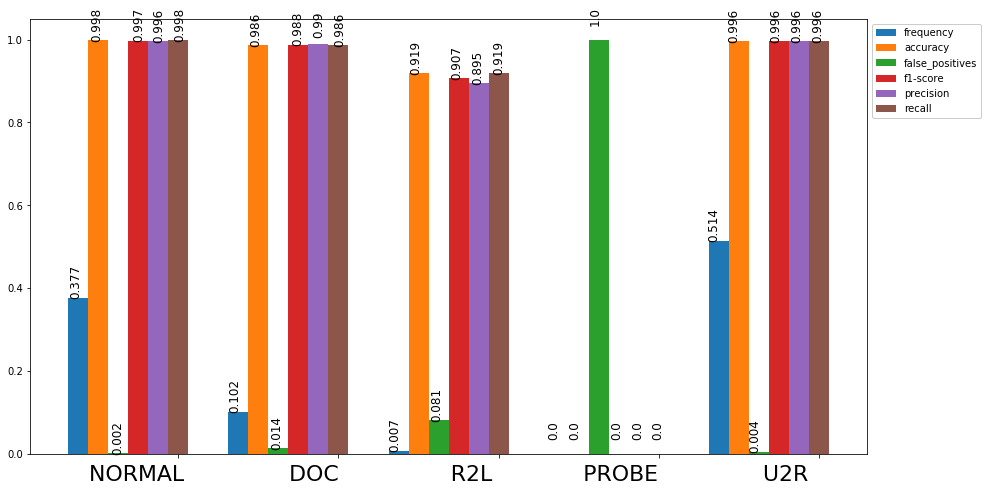

In [69]:
results=[list(i).index(max(i)) for i in cnn.predict(x_test.reshape(5001, 42,1))]
tru=[list(i).index(max(i)) for i in y_test]
cm=confusion_matrix(tru,results)
frequencies=[tru.count(i)/len(tru) for i in set(tru)]
accuracies={i:0 for i in range(5)}
for i,val in enumerate(tru):
    if val==results[i]:
        accuracies[val]+=1
accuracy=[accuracies[i]/tru.count(i) for i in range(5)]
false_positives={i:0 for i in range(5)}
for i in range(5):
    false_positives[i]=(sum(cm[i])-cm[i][i])/sum(cm[i])
cf=metrics.classification_report(tru,results,output_dict=True)
data=np.array([np.array(frequencies),np.array(accuracy),np.array([i for i in false_positives.values()])
               ,np.array([cf[str(i)]['f1-score'] for i in range(5)]),
               np.array([cf[str(i)]['precision'] for i in range(5)]),
               np.array([cf[str(i)]['recall'] for i in range(5)])]).T
x = np.arange(data.shape[0])
dx = (np.arange(data.shape[1])-data.shape[1]/2.)/(data.shape[1]+2.)
d = 1./(data.shape[1]+2.)
fig, ax=plt.subplots()
ax.figure.set_size_inches(15, 8)
labels=['frequency','accuracy','false_positives','f1-score','precision','recall']
for i in range(data.shape[1]):
    ax.bar(x+dx[i],data[:,i], width=d, label=labels[i],tick_label='')
x0=-0.43
for i in range(5):
    for j in range(6):
        ax.text(x0,data[i][j]+0.055,round(data[i][j],3),fontsize=12,rotation=90)
        x0+=0.13
    x0+=0.215       
plt.xlabel('NORMAL               DOC                R2L             PROBE               U2R',fontsize=22)
plt.legend(framealpha=1,loc=2,bbox_to_anchor=(1, 1)).draggable()
plt.show()